In [159]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import joblib

In [160]:
file_path = "churn_data.xlsx"
excel_data = pd.read_excel(file_path)

In [161]:
excel_data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.599998,593.299988,0.000000,0,381.510010,974.809998,Stayed,Others,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.000000,542.400024,38.330002,10,96.209999,610.280029,Stayed,Others,Others
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.900002,280.850006,0.000000,0,134.600006,415.450012,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.000000,1237.849976,0.000000,0,361.660004,1599.510010,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.900002,267.399994,0.000000,0,22.139999,289.540009,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,43397-UTT,Female,41,No,Uttar Pradesh,6,33,NaN,Yes,Yes,...,Credit Card,74.400002,896.750000,0.000000,0,37.959999,934.710022,Churned,Competitor,Competitor made better offer
6003,22240-HAR,Male,51,Yes,Haryana,0,19,Deal 1,No,No,...,Credit Card,45.250000,3139.800049,0.000000,0,0.000000,3139.800049,Stayed,Others,Others
6004,78682-KER,Female,65,Yes,Kerala,14,25,NaN,Yes,Yes,...,Bank Withdrawal,74.949997,2869.850098,0.000000,0,599.640015,3469.489990,Churned,Dissatisfaction,Product dissatisfaction
6005,17816-ODI,Male,23,No,Odisha,2,10,NaN,Yes,Yes,...,Credit Card,70.150002,4480.700195,0.000000,0,2107.520020,6588.220215,Stayed,Others,Others


In [162]:
excel_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.599998,593.299988,0.000000,0,381.510010,974.809998,Stayed,Others,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.000000,542.400024,38.330002,10,96.209999,610.280029,Stayed,Others,Others
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.900002,280.850006,0.000000,0,134.600006,415.450012,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.000000,1237.849976,0.000000,0,361.660004,1599.510010,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.900002,267.399994,0.000000,0,22.139999,289.540009,Churned,Dissatisfaction,Network reliability


In [163]:
# Drop unnecessary columns
columns_to_drop = [
    'Customer_ID', 'Churn_Category', 'Churn_Reason', 'Phone_Service', 
    'Streaming_TV', 'Streaming_Movies', 'Unlimited_Data', 'Multiple_Lines', 
    'Gender', 'Married', 'Streaming_Music', 'Device_Protection_Plan'
]
excel_data = excel_data.drop(columns_to_drop, axis=1)

In [164]:
columns_to_encode = [
    'State', 'Value_Deal', 'Internet_Service', 'Internet_Type', 'Online_Security', 
    'Online_Backup', 'Premium_Support', 'Contract', 'Paperless_Billing', 
    'Payment_Method'
]

In [165]:
excel_data.head()

,Age,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Internet_Service,Internet_Type,Online_Security,Online_Backup,Premium_Support,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,35,Delhi,7,27,NaN,Yes,Cable,No,Yes,Yes,One Year,Yes,Credit Card,65.599998,593.299988,0.000000,0,381.510010,974.809998,Stayed
1,45,Maharashtra,14,13,NaN,Yes,Cable,No,No,No,Month-to-Month,No,Credit Card,-4.000000,542.400024,38.330002,10,96.209999,610.280029,Stayed
2,51,West Bengal,4,35,Deal 5,Yes,Fiber Optic,No,No,No,Month-to-Month,Yes,Bank Withdrawal,73.900002,280.850006,0.000000,0,134.600006,415.450012,Churned
3,79,Karnataka,3,21,Deal 4,Yes,Fiber Optic,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,98.000000,1237.849976,0.000000,0,361.660004,1599.510010,Churned
4,80,Tamil Nadu,3,8,NaN,Yes,Fiber Optic,No,No,Yes,Month-to-Month,Yes,Credit Card,83.900002,267.399994,0.000000,0,22.139999,289.540009,Churned


In [166]:
excel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6007 non-null   int64  
 1   State                        6007 non-null   object 
 2   Number_of_Referrals          6007 non-null   int64  
 3   Tenure_in_Months             6007 non-null   int64  
 4   Value_Deal                   2710 non-null   object 
 5   Internet_Service             6007 non-null   object 
 6   Internet_Type                4784 non-null   object 
 7   Online_Security              6007 non-null   object 
 8   Online_Backup                6007 non-null   object 
 9   Premium_Support              6007 non-null   object 
 10  Contract                     6007 non-null   object 
 11  Paperless_Billing            6007 non-null   object 
 12  Payment_Method               6007 non-null   object 
 13  Monthly_Charge    

In [167]:
excel_data.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246020
std,16.805110,4.622369,10.59292,31.067808,2267.481295,8.065520,25.405737,854.858840,2856.181081
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610001
25%,33.000000,3.000000,8.00000,35.950001,539.949982,0.000000,0.000000,107.084999,833.684998
50%,47.000000,7.000000,17.00000,71.099998,1556.849976,0.000000,0.000000,470.220001,2367.149902
75%,60.000000,11.000000,27.00000,90.449997,4013.900024,0.000000,0.000000,1269.839966,5105.685059
max,84.000000,15.000000,36.00000,118.750000,8684.799805,49.790001,150.000000,3564.719971,11979.339844


In [168]:
df = excel_data.copy()

In [169]:
df.head()

,Age,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Internet_Service,Internet_Type,Online_Security,Online_Backup,Premium_Support,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,35,Delhi,7,27,NaN,Yes,Cable,No,Yes,Yes,One Year,Yes,Credit Card,65.599998,593.299988,0.000000,0,381.510010,974.809998,Stayed
1,45,Maharashtra,14,13,NaN,Yes,Cable,No,No,No,Month-to-Month,No,Credit Card,-4.000000,542.400024,38.330002,10,96.209999,610.280029,Stayed
2,51,West Bengal,4,35,Deal 5,Yes,Fiber Optic,No,No,No,Month-to-Month,Yes,Bank Withdrawal,73.900002,280.850006,0.000000,0,134.600006,415.450012,Churned
3,79,Karnataka,3,21,Deal 4,Yes,Fiber Optic,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,98.000000,1237.849976,0.000000,0,361.660004,1599.510010,Churned
4,80,Tamil Nadu,3,8,NaN,Yes,Fiber Optic,No,No,Yes,Month-to-Month,Yes,Credit Card,83.900002,267.399994,0.000000,0,22.139999,289.540009,Churned


In [170]:
df.isnull().sum()

Age                               0
State                             0
Number_of_Referrals               0
Tenure_in_Months                  0
Value_Deal                     3297
Internet_Service                  0
Internet_Type                  1223
Online_Security                   0
Online_Backup                     0
Premium_Support                   0
Contract                          0
Paperless_Billing                 0
Payment_Method                    0
Monthly_Charge                    0
Total_Charges                     0
Total_Refunds                     0
Total_Extra_Data_Charges          0
Total_Long_Distance_Charges       0
Total_Revenue                     0
Customer_Status                   0
dtype: int64

In [171]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Value_Deal', 'Internet_Type']

<Axes: >

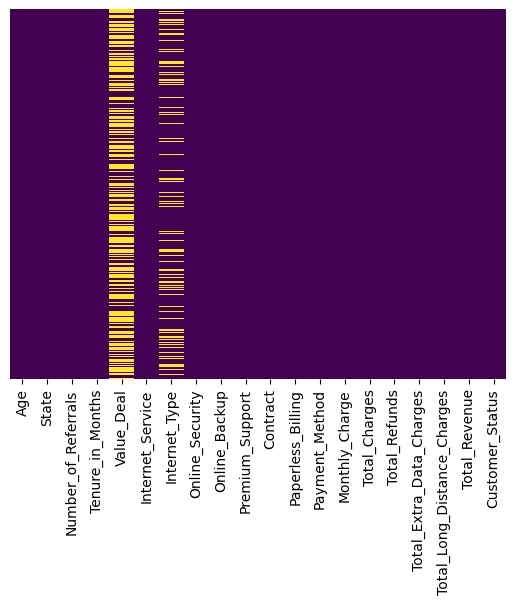

In [172]:
sns.heatmap(df.isnull() , yticklabels=False ,cbar =False ,cmap ='viridis')

In [173]:
df.head()

,Age,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Internet_Service,Internet_Type,Online_Security,Online_Backup,Premium_Support,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,35,Delhi,7,27,NaN,Yes,Cable,No,Yes,Yes,One Year,Yes,Credit Card,65.599998,593.299988,0.000000,0,381.510010,974.809998,Stayed
1,45,Maharashtra,14,13,NaN,Yes,Cable,No,No,No,Month-to-Month,No,Credit Card,-4.000000,542.400024,38.330002,10,96.209999,610.280029,Stayed
2,51,West Bengal,4,35,Deal 5,Yes,Fiber Optic,No,No,No,Month-to-Month,Yes,Bank Withdrawal,73.900002,280.850006,0.000000,0,134.600006,415.450012,Churned
3,79,Karnataka,3,21,Deal 4,Yes,Fiber Optic,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,98.000000,1237.849976,0.000000,0,361.660004,1599.510010,Churned
4,80,Tamil Nadu,3,8,NaN,Yes,Fiber Optic,No,No,Yes,Month-to-Month,Yes,Credit Card,83.900002,267.399994,0.000000,0,22.139999,289.540009,Churned


In [174]:
import pandas as pd 

In [175]:
import numpy as np 

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
# Encode categorical variables
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [179]:
df['Customer_Status'] = df['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [180]:
X = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']

In [181]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [182]:
X_train , X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

train random forest

In [183]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
#training the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [184]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [185]:
y_pred = best_model.predict(X_test)


In [186]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[791  50]
 [127 234]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       841
           1       0.82      0.65      0.73       361

    accuracy                           0.85      1202
   macro avg       0.84      0.79      0.81      1202
weighted avg       0.85      0.85      0.85      1202



In [187]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 85.27%


In [188]:
# Feature Selection using Feature Importance

importances = model.feature_importances_
indices = np.argsort(importances)[::-1] 

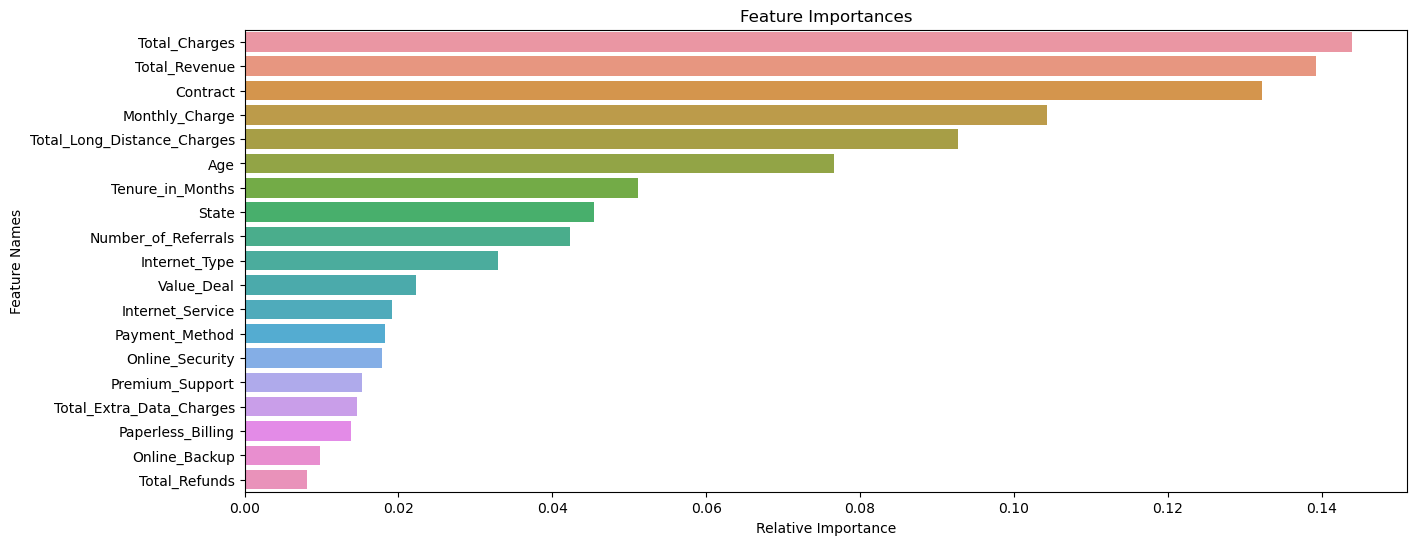

In [189]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=df.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [190]:
file = "join _data.xlsx"
df_1 = pd.read_excel(file)


In [191]:
df_1

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.099998,72.099998,0.0,0,7.770000,79.870003,Joined,Others,Others
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,Credit Card,19.850000,57.200001,0.0,0,9.360000,66.559998,Joined,Others,Others
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.299999,44.299999,0.0,0,42.950001,87.250000,Joined,Others,Others
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,Credit Card,19.950001,58.000000,0.0,0,8.070000,66.070000,Joined,Others,Others
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,Credit Card,20.049999,33.700001,0.0,0,3.620000,37.320000,Joined,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,31412-HAR,Female,81,Yes,Haryana,14,29,NaN,Yes,No,...,Bank Withdrawal,19.200001,37.200001,0.0,0,14.060000,51.259998,Joined,Others,Others
407,54997-UTT,Female,55,No,Uttar Pradesh,7,23,NaN,Yes,No,...,Credit Card,44.000000,44.000000,0.0,0,26.150000,70.150002,Joined,Others,Others
408,56728-RAJ,Male,40,No,Rajasthan,0,1,NaN,Yes,No,...,Credit Card,45.599998,45.599998,0.0,0,37.439999,83.040001,Joined,Others,Others
409,47624-TAM,Female,62,Yes,Tamil Nadu,7,29,NaN,Yes,No,...,Mailed Check,-5.000000,189.100006,0.0,0,100.589996,289.690002,Joined,Others,Others


In [192]:
origional_data = df_1.copy()

In [193]:
customer_ids =df_1['Customer_ID']

In [194]:
df_1 = df_1.drop(columns_to_drop + ['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)


In [195]:
# Encode categorical variables using the saved label encoders
for column in df_1.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        df_1[column] = label_encoders[column].transform(df_1[column])
    else:
        print(f"Column '{column}' not found in label_encoders.")

In [196]:
df_1 = scaler.transform(df_1)

In [197]:
# Predict on new data
new_predictions = best_model.predict(df_1)
origional_data['Customer_Status_Predicted'] = new_predictions
origional_data = origional_data[origional_data['Customer_Status_Predicted'] == 1]
origional_data.to_csv('newprediction.csv', index=False, sep=';')